<a href="https://colab.research.google.com/github/mmobbili/dmcyt_2022/blob/master/2022_Reducci%C3%B3n_de_la_dimensionalidad_MDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install minisom
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=47d4ad9208ddd1b91a7081657ac88d1785cb011f5f47599ff5cdc52d7830b3d4
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 32.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b28d2816d383ee9b58ea602bb4ee7372beb4ecc21aee927a123e1d60b0abf9de
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=4e1b58d12f4219165a3668158f27cd1bf005b809ab0

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
from IPython.display import Audio, Markdown, Image, YouTubeVideo, HTML

# Números y Datos
import numpy as np
import pandas as pd
import random

# Machine learning
# from sklearn.datasets import samples_generator, fetch_openml, load_digits
from sklearn.datasets import make_s_curve, fetch_openml, load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, SpectralEmbedding, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#from umap import UMAP
from minisom import MiniSom
from umap import UMAP

def mosaic(imgs_array, n_columns=6):
    dims = imgs_array.shape[1:3]

    width = int(n_columns * dims[1])
    n_rows = np.ceil(imgs_array.shape[0] / n_columns)
    height = int(n_rows * dims[0])

    if imgs_array.ndim == 3:
        mosaic = np.zeros((height, width))
    elif imgs_array.ndim == 4:
        mosaic = np.zeros((height, width, imgs_array.shape[3]))

    for k, img in enumerate(imgs_array):
        i = k // n_columns
        j = k % n_columns
        mosaic[i * dims[1]:(i + 1) * dims[1], j * dims[0]
                            :(j + 1) * dims[0]] = img
    return mosaic


# Reducción de la dimensionalidad y aprendizaje de variedades
(Modificado de Pablo Riera, 2020)

Imagen de la documentación de skelarn [Manifold Learning](https://scikit-learn.org/stable/modules/manifold.html)
![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_compare_methods_001.png)


Página de wikipedia [Nonlinear dimensionality reduction](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction)

![image.png](https://upload.wikimedia.org/wikipedia/commons/f/fd/Lle_hlle_swissroll.png)

### Vamos a ver:

### PCA, SVD, MDS, ISOMAP, Spectral Embedding, Mapa Autoorganizado, T-SNE, UMAP

Survey: http://drops.dagstuhl.de/opus/volltexte/2012/3747/pdf/12.pdf

# PCA y SVD

En PCA la idea es quedarse con un número reducido de autovectores de la covarianza.

Dada una matriz con datos $X$. Las features rotadas por las componentes principales son los autovectores de la matriz de distancia $\mathbf {C} = \frac{\mathbf {X} \cdot \mathbf {X^{T}}}{m-1}$
$${\displaystyle \mathbf {C} = \mathbf {V}\mathbf {D}\mathbf {V^{-1}}}$$

SVD descompone a una matriz $\mathbf {X}$ no necesariamente cuadrada en 

$$\mathbf {X} =\mathbf {U} {\boldsymbol {S }}\mathbf {V^{T}}$$

Referencia sobre relaciones entre entre PCA y SVD:
https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491

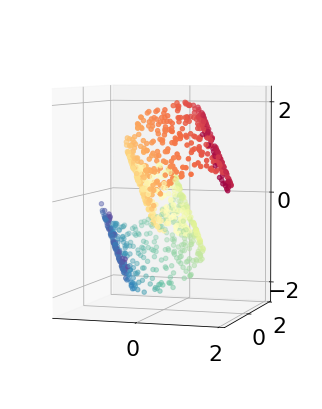

In [ ]:
X, y = make_s_curve(1000, random_state=0)

# centramos X
X = X - X.mean(0)

from scipy.spatial.transform import Rotation as R
r1 = R.from_euler('xz', [45,45], degrees=True)

X = r1.apply(X)

fig = plt.figure(figsize=(32,16))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap = plt.cm.Spectral)
ax.view_init(4, -72);

In [ ]:
X.shape

(1000, 3)

In [ ]:
pca = PCA(n_components=3)
Z = pca.fit(X)


PCA
Varianza explicada por componente: [68.84588811 18.27835543 12.87575646]


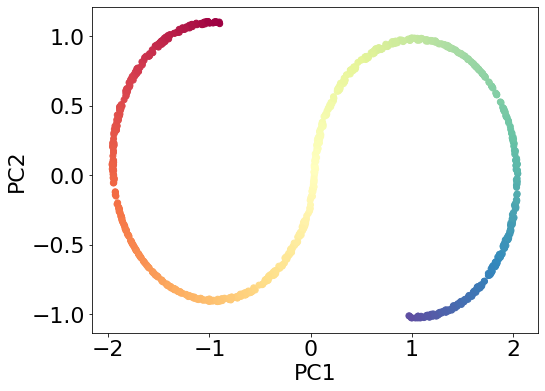

In [ ]:
pca = PCA(n_components=3)
Y = pca.fit_transform(X)

#plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap = plt.cm.Spectral)

#fig = plt.figure(figsize=(32,16))
#ax = fig.add_subplot(251, projection='3d')
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap = plt.cm.Spectral)
#ax.scatter(Y[:, 1], Y[:, 2], Y[:, 0], c=y, cmap = plt.cm.Spectral)
#ax.view_init(4, -72);
plt.xlabel('PC1')
plt.ylabel('PC2')

print('PCA')
print('Varianza explicada por componente:',100*pca.explained_variance_ / sum(pca.explained_variance_))

Full SVD
Formas de las matrices USV (3, 3) (3,) (1000, 1000)
Valores singulares [43.7118748  22.52314275 18.9036996 ]
Varianza [1.91264064 0.50779976 0.35770757]


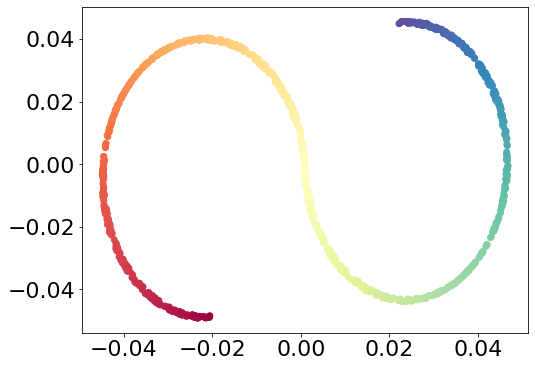


TruncatedSVD
Valores singulares [1.910728   0.50729196]


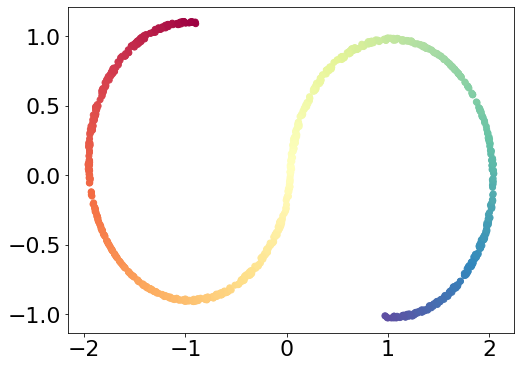

In [ ]:
U,S,V = np.linalg.svd(X.T)

print('Full SVD')
print('Formas de las matrices USV', U.shape,S.shape,V.shape)
print('Valores singulares', S) #print('Valores singulares', S**2/(len(X)-1))
print('Varianza', S**2/(len(X)-1)) #print('Valores singulares', S**2/(len(X)-1))

plt.figure()
plt.scatter(V.T[:, 0], V.T[:, 1], c=y, cmap = plt.cm.Spectral)
plt.show()

svd = TruncatedSVD(n_components=2)
Y = svd.fit_transform(X)
C = svd.components_

plt.figure()
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap = plt.cm.Spectral)

print('\nTruncatedSVD')
print('Valores singulares',svd.explained_variance_)

Cambiemos el dataset a datasets de dígitos

MNIST (70000x28x28), sklearn (1797x8x8)

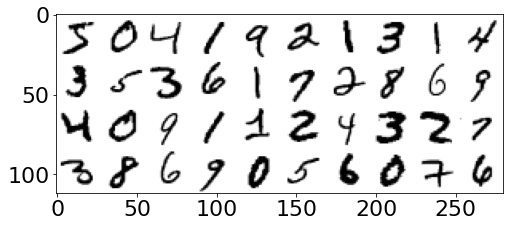

In [ ]:
X2, y2 = fetch_openml('mnist_784', version=1, return_X_y=True)
y2 = list(map(int,y2))
Xim = np.array(X2).reshape(len(X2),28,28)
X2 = scale(X2)
plt.imshow(mosaic(Xim[:40],10),cmap=plt.cm.gray_r);

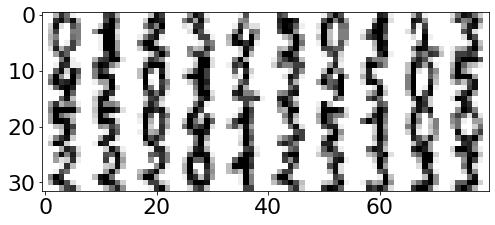

In [ ]:
# load the digits dataset from scikit-learn
digits = load_digits(n_class=6)
X2 = digits.data 
X2 = scale(X2)
y2 = digits.target 

aux = digits.images[:40]
plt.imshow(mosaic(aux,10),cmap=plt.cm.gray_r);

In [ ]:
X2.shape

(1083, 64)

Varianza explicada [0.15372715 0.10251328 0.08009215 0.07010239]
Varianza explicada total 0.40643497380406535


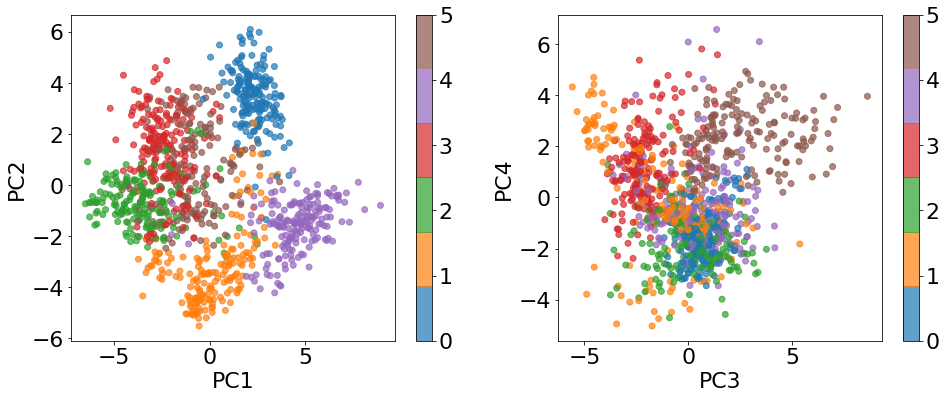

In [ ]:
pca = PCA(n_components=4)
Xred = pca.fit_transform(X2)

cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', plt.cm.tab10(np.arange(6)), 6)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],c=y2,cmap=cmap, alpha=0.7)
plt.colorbar();
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],c=y2,cmap=cmap, alpha=0.7)
plt.colorbar(ticks=range(6));
plt.xlabel('PC3')
plt.ylabel('PC4')

# print('Varianza explicada',pca.explained_variance_/sum(pca.explained_variance_))
print('Varianza explicada',pca.explained_variance_ratio_)
print('Varianza explicada total',pca.explained_variance_ratio_.sum())

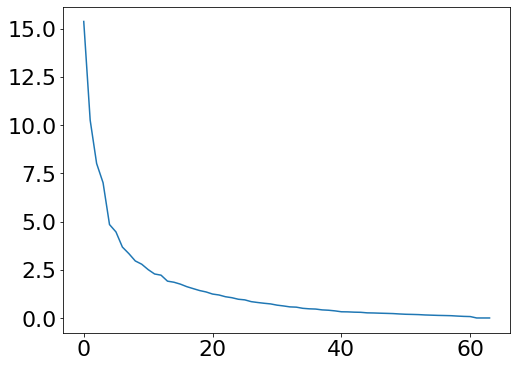

In [ ]:
pca = PCA()
Xfull = pca.fit_transform(X2)
plt.plot(100*pca.explained_variance_ratio_)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.hlines(0.95,0,64)

# Multidimensional Scaling (MDS)

Encontrar un conjunto de puntos en un espacio de dimension donde las distancias entre los puntos sea lo más parecida posible a las distancias de los puntos en el espacio original. Esto implica minimizar el llamado _stress_

$$ \sigma (X)=\sum _{i<j\leq n}w_{ij}(d_{ij}(X)-\delta _{ij})^{2} $$

Donde $\delta _{ij}$ son las distancias en el espacio original, $d_{ij}(X)$ las distancias en el nuevo espacio en base a los punto $X$ y $w_{ij}$ un conjunto de pesos que sirven para penalizar información sobre pares de puntos. 

La función a optimizar es convexa. Unos de los algoritmos para optimizar (el que usa sklearn) se llama SMACOF "Scaling by MAjorizing a COmplicated Function". Hay varios algoritmos según el caso. Si no se consideran pesos y las distancias son euclideas se tiene el caso _Classical MDS_ que es equivalente a hacer PCA sobre una matriz de similaridades.

Variantes:
* No métrico (ordinal)
* Sammon Mapping (distancias relativas)

Referencias:
* [Escalamiento Multidimensional No Métrico.
Un ejemplo con R empleando el algoritmo
SMACOF](https://www.unav.edu/publicaciones/revistas/index.php/estudios-sobre-educacion/article/download/4650/4007)
* “Modern Multidimensional Scaling - Theory and Applications” Borg, I.; Groenen P. Springer Series in Statistics (1997)



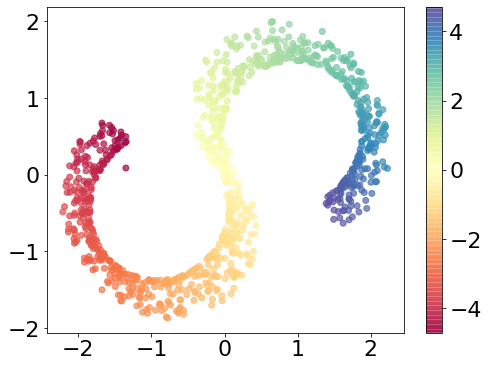

In [ ]:
mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=100)
Xred = mds.fit_transform(X)
plt.scatter(Xred[:,0],Xred[:,1],c=y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

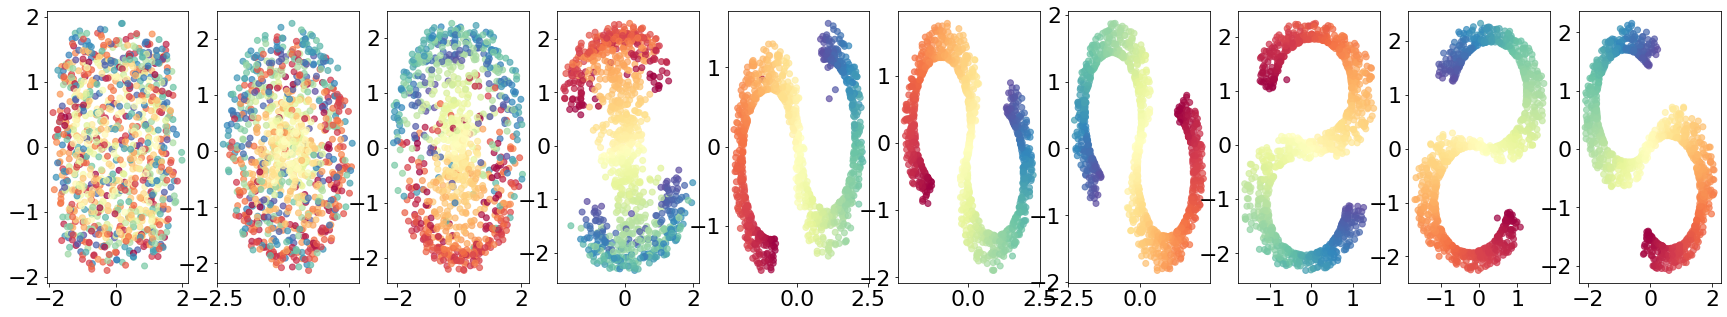

In [ ]:
#plt.figure(figsize=(5,30))
stress = []
ITER = [1,5,10,20,50,100,150,250,500,1000]
fig, ax = plt.subplots(nrows=1,ncols=len(ITER),figsize=(30,5))
for i in range(0,len(ITER)):
  mds = MDS(n_components=2, n_jobs = 8, eps=0.1, max_iter=ITER[i])
  Xred = mds.fit_transform(X)
  stress.append(mds.stress_)
  ax[i].scatter(Xred[:,0],Xred[:,1],c=y,cmap=plt.cm.Spectral,alpha=0.7)
#ax[i].colorbar();

In [ ]:
stress

NameError: ignored

In [ ]:
#plt.figure(figsize=(5,30))
stress = []
fig, ax = plt.subplots(nrows=1,ncols=8,figsize=(30,5))
for i in range(2,8):
  mds = MDS(n_components=i, n_jobs = 8, eps=0.1)
  Xred = mds.fit_transform(X)
  stress.append(mds.stress_)
  ax[i-2].scatter(Xred[:,0],Xred[:,1],c=y,cmap=plt.cm.Spectral,alpha=0.7)
#ax[i].colorbar();

In [ ]:
stress

[42698.34654350923,
 462.445119700197,
 1003.0963455496408,
 1141.174956205933,
 1300.1731683308014,
 1334.1966678745464]

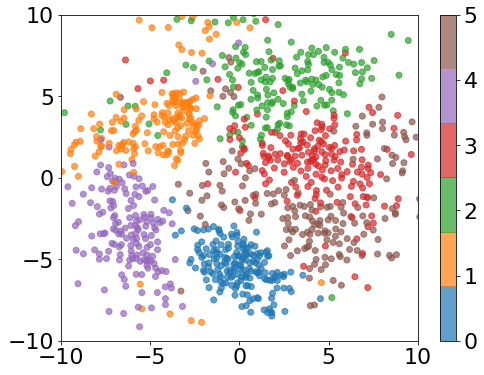

In [ ]:
mds = MDS(n_components=2, n_jobs=8, eps=0.1, max_iter=1000)
Xred = mds.fit_transform(X2)

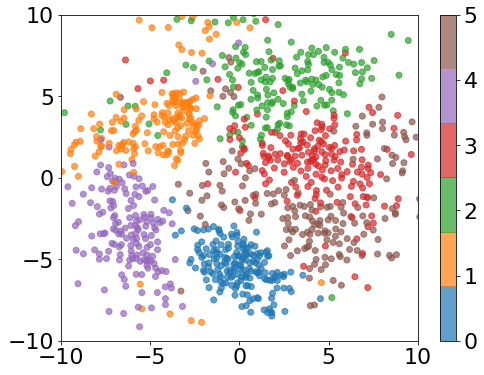

In [ ]:
plt.scatter(Xred[:,0],Xred[:,1],c=y2,cmap=cmap,alpha=0.7)
plt.colorbar(ticks=range(6));
plt.xlim(-10,10)
plt.ylim(-10,10);

# ISOMAP

Similar a MDS pero las distancias que se computan son geodésicas (a.k.a., distancia sobre el grafo de vécinos)

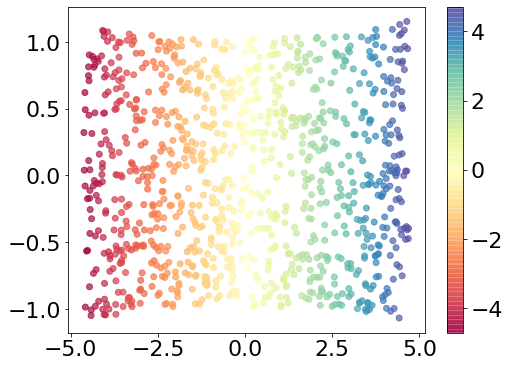

In [ ]:
isomap = Isomap(n_components=2, n_neighbors=50)
Xred = isomap.fit_transform(X)
plt.scatter(Xred[:,0],Xred[:,1],c=y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

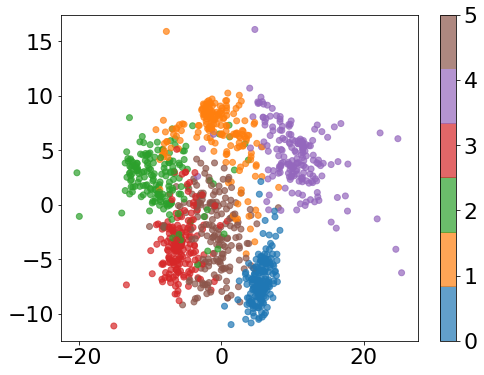

In [ ]:
isomap = Isomap(n_components=2, n_neighbors=75)
Xred = isomap.fit_transform(X2)
plt.scatter(Xred[:,0],Xred[:,1],c=y2,cmap=cmap,alpha=0.7)
plt.colorbar();

# Spectral Embedding (Laplacian eigenmaps)

Primeros autovectores de la matriz Laplaciana.

Versión no normalizada $L = D - A$ donde $D$ es una matriz diagonal con los grados de los nodos y $A$ es la matriz de adyacencia o versión normalizada $ L = D^{-1/2} W D^{-1/2} $ donde $W$ es la matriz de afinidad $ W = {\displaystyle e^{-\gamma\|s_{1}-s_{2}\|^{2}}} $

Referencias:
* [Laplacian Eigenmaps for Dimensionality
Reduction and Data Representation](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.9.5888&rep=rep1&type=pdf)


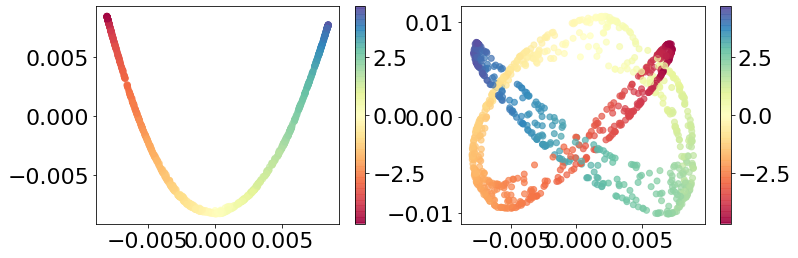

In [ ]:
spem = SpectralEmbedding(n_components=4,  n_neighbors=30)
Xred = spem.fit_transform(X)
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(Xred[:,0],Xred[:,1],c=y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();
plt.subplot(1,2,2)
plt.scatter(Xred[:,2],Xred[:,3],c=y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

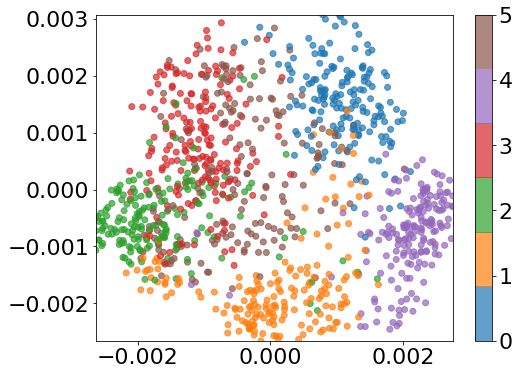

In [ ]:
spem = SpectralEmbedding(n_components=2, n_neighbors=500)
Xred = spem.fit_transform(X2)
plt.scatter(Xred[:,0],Xred[:,1],c=y2,cmap=cmap,alpha=0.7)
plt.colorbar(ticks=range(6));
plt.xlim(Xred[:,0].min(),Xred[:,0].max())
plt.ylim(Xred[:,1].min(),Xred[:,1].max());

# Mapas Autoorganizados (Self-Organized Maps, SOM)

Los Mapas autoorganizados o también llamados mapas de Kohonen. Son redes neuronales artificiales tipicamente organizadas en forma de grilla, donde cada neurona es representada por un vector de pesos $W$ que luego del entrenamiento logra imitar a la distribución de los datos.

El proceso de entrenamiento es iterativo y en cada paso se ejecuta la siguiente actualización para la neurona $v$.

$$ \displaystyle W_{v}(s+1)=W_{v}(s)+\theta (u,v,s)\cdot \alpha (s)\cdot (D(t)-W_{v}(s)) $$

$s$ is the current iteration

${\displaystyle \lambda }$ is the iteration limit

${\displaystyle t}$ is the index of the target input data vector in the input data set ${\displaystyle \mathbf {D} }$

${\displaystyle {D}(t)}$ is a target input data vector

${\displaystyle v}$ is the index of the node in the map

${\displaystyle \mathbf {W} _{v}}$ is the current weight vector of node ${\displaystyle v}$

${\displaystyle u}$ is the index of the best matching unit (BMU) in the map

${\displaystyle \theta (u,v,s)}$ is a restraint due to distance from BMU, usually called the neighbourhood 
function, and ${\displaystyle \alpha (s)}$ is a learning restraint due to iteration progress.

![img](https://upload.wikimedia.org/wikipedia/commons/3/35/TrainSOM.gif)

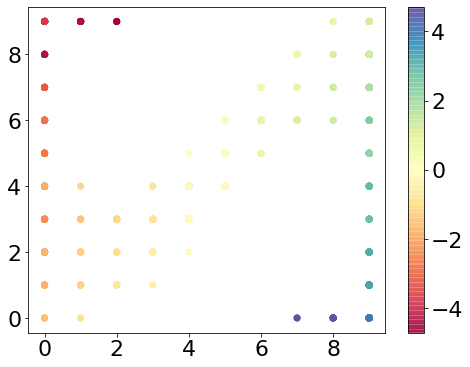

In [ ]:
som = MiniSom(10, 10, 3, learning_rate=0.001, sigma=1, neighborhood_function='gaussian')
som.pca_weights_init(X)
som.train_random(X, 1000)  # random training

Xred = np.zeros((len(X),2))
for i, (x, t) in enumerate(zip(X, y)):  # scatterplot
    Xred[i,:] = som.winner(x)
    
plt.scatter(Xred[:,0],Xred[:,1],c=y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

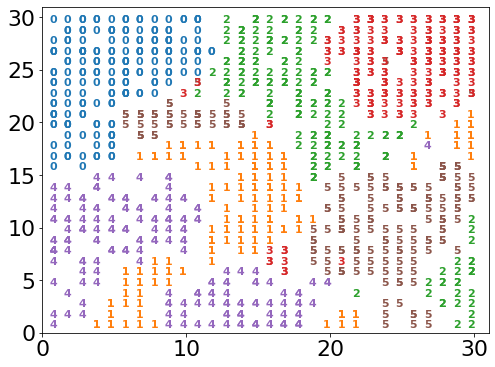

In [ ]:
som = MiniSom(30, 30, 64, sigma=4, learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(X2)
som.train_random(X2, 5000)  # random training

wmap = {}
im = 0
for x, t in zip(X2, y2):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.tab10(t), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0]+1, 0,  som.get_weights().shape[1]+1]);

# T-distributed Stochastic Neighbour Embedding (TSNE)

TSNE busca crear una proyección a un espacio de dimensión menor tratando de preservar la distribución de puntos en el espacio original manteniendo los agrupamientos locales.

Para esto se busca minimizar la distancia Kullback Leibler entre dos distribuciones, una relacionada al espacio original y otra al nuevo. Estas distrubiciones miden la similaridad entre dos puntos en base a la probabilidad de que uno tome como vecino al otro.

$$ {\displaystyle p_{j\mid i}={\frac {\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{j}\rVert ^{2}/2\sigma _{i}^{2})}{\sum _{k\neq i}\exp(-\lVert \mathbf {x} _{i}-\mathbf {x} _{k}\rVert ^{2}/2\sigma _{i}^{2})}},} $$ 


$$ {\displaystyle q_{ij}={\frac {(1+\lVert \mathbf {y} _{i}-\mathbf {y} _{j}\rVert ^{2})^{-1}}{\sum _{k\neq i}(1+\lVert \mathbf {y} _{i}-\mathbf {y} _{k}\rVert ^{2})^{-1}}}} $$

Se hacen simétricas las distribuciones ${\displaystyle p_{ij}={\frac {p_{j\mid i}+p_{i\mid j}}{2N}}}$ y se mide la divergencia KL

$$ {\displaystyle KL(P||Q)=\sum _{i\neq j}p_{ij}\log {\frac {p_{ij}}{q_{ij}}}} $$

Uno de los parámetros libres de TSNE es la _perplexity_ que mide en cierta forma la cantidad de vecinos que se consideran. Sirve para calcular para cada punto la desviación $\sigma$ en base a la fórmula: $P = 2^{{-\sum _{x}p(x)\log _{2}p(x)}}$

Demo online:

[How to Use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


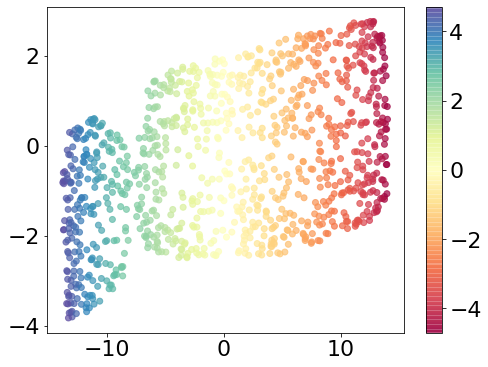

In [ ]:
tsne = TSNE(n_components=2,perplexity=200)
Xred = tsne.fit_transform(X)
plt.scatter(Xred[:,0],Xred[:,1],c=y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


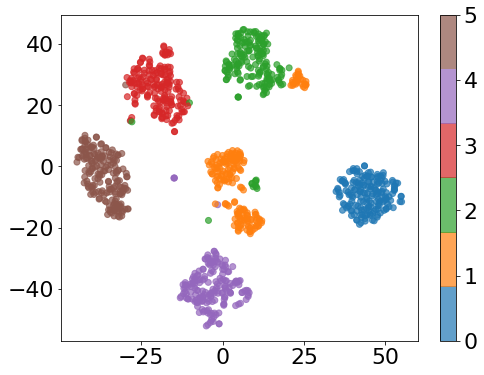

In [ ]:
tsne = TSNE(n_components=2)
Xred = tsne.fit_transform(X2)
plt.scatter(Xred[:,0],Xred[:,1],c=y2,cmap=cmap,alpha=0.7)
plt.colorbar(ticks=range(6));

# Uniform Manifold Approximation and Projection (UMAP)

Similar a TSNE pero en vez de usar distribuciones de probabilidad de vecinos en los espacios de alta y baja dimensión, construye un grafo en el espacio de alta dimensión utilizando vecinos y simplices difusos, y trata de generar una representación de baja dimensionalidad que recree ese grafo.

Ventajas: es más rápido que TSNE, preserva más información global, tiene opción para entrenamiento supervisado.

[Understanding UMAP](https://pair-code.github.io/understanding-umap/)

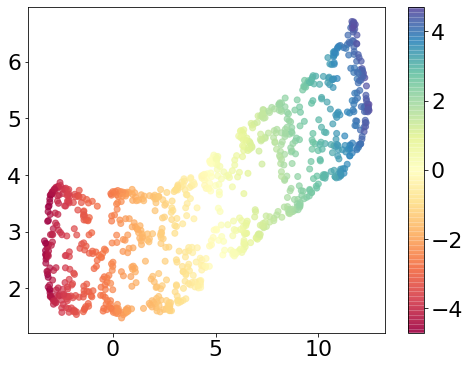

In [ ]:
um = UMAP(n_neighbors=500)
Xred = um.fit_transform(X)
plt.scatter(Xred[:,0],Xred[:,1],c=y,cmap=plt.cm.Spectral,alpha=0.7)
plt.colorbar();

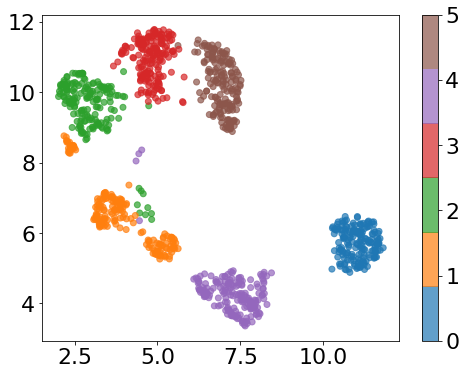

In [ ]:
um = UMAP(n_neighbors=250)
Xred = um.fit_transform(X2)
plt.scatter(Xred[:,0],Xred[:,1],c=y2,cmap=cmap,alpha=0.7)
plt.colorbar(ticks=range(6));

# Herramienta online para comparar PCA, TSNE y UMAP
### [Embedding Projector](http://projector.tensorflow.org/)

# Supervisado

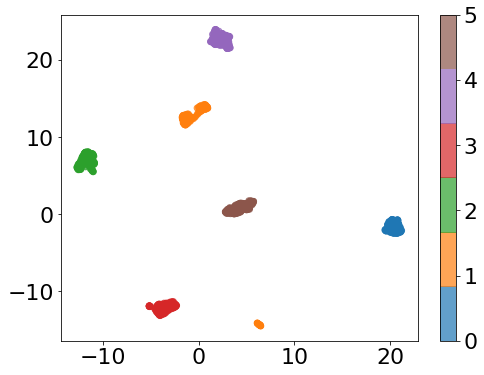

In [ ]:
# Umap supervisado
um = UMAP()
Xred = um.fit_transform(X2,y2)
plt.scatter(Xred[:,0],Xred[:,1],c=y2,cmap=cmap,alpha=0.7)
plt.colorbar(ticks=range(6));

# Hablando de supervisados, se pusede hacer reducción de la dimensionalidad con Linear Discriminant Analysis

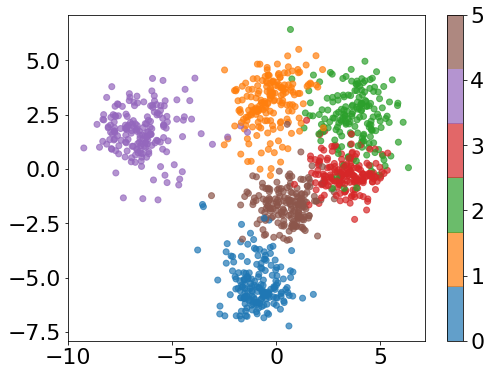

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
Xred = lda.fit_transform(X2,y2)
plt.scatter(Xred[:,0],Xred[:,1],c=y2,cmap=cmap,alpha=0.7)
plt.colorbar(ticks=range(6));